In [577]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

In [578]:
img = Image.open('./Images/3.png')
img = img.convert('L')
img_array = np.array(img)

In [579]:
def euclid_dist(p1, p2):
    # returns the euclidean distance between two points
    return np.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

In [580]:
def initial_centroids(k, white_pixels):
    # initialises the centroids by picking any k uniform random points
    # from the white points
    rng = np.random.default_rng()
    return rng.choice(white_pixels, k, replace=False)

In [581]:
def assign_clusters(k, white_pixels, centroids):
    # assigns clusters to each point based on the minimum distance 
    # between the point and the three centroids
    clusters = {}

    for j in range(k):
        clusters[j] = []

    for point in white_pixels:
        distances = []
        for i in centroids:
            distances.append(euclid_dist(point, i))
        cluster_index = distances.index(min(distances))
        clusters[cluster_index].append(point)

    return clusters

In [582]:
def centroid_cluster(k, clusters):
    # generates new centroids by averaging all the points in a particular cluster
    centroids = []
    for i in range(k):
        x, y = zip(*clusters[i])
        centroids.append([int((sum(x)/len(x))), int((sum(y)/len(y)))])

    return centroids

In [583]:
def cluster_variance(k, clusters):
    # calculates the sum of square of distances of the points in a cluster
    # from their respective centroids and then totals them up
    centroids = centroid_cluster(k, clusters)
    variance = []
    for i in range(k):
        vr = 0
        for point in clusters[i]:
            vr += euclid_dist(point, centroids[i])**2
        variance.append(vr)

    return sum(variance)

In [584]:
def KMeans(k, data_points, iter=30):
    # implementation of the KMeans clustering
    # first generate random k centroids
    # assign all the points to a cluster based on the distances from the centroids
    # generate new centroids by averaging the points in a particular cluster
    # continue this process till we stop getting new centroids
    # the clustering accuracy depends on the initial centroids generated
    # the accuracy is measured by the sum of squares of distances
    # we aim to minimize this sum of squares
    # for this we run our KMeans for some constant iterations and take 
    # that clustering which has the minimum sum of squares

    centroids = None
    clusters = None
    variance = float('inf')
    white_pixels = np.argwhere(data_points==255)

    for _ in range(iter):
        centroids_ = initial_centroids(k, white_pixels).tolist()
        
        try:
            while True:
                clusters_ = assign_clusters(k, white_pixels, centroids_)
                new_centroids = centroid_cluster(k, clusters_)
                
                if new_centroids == centroids_ : 
                    break
                centroids_ = new_centroids
            
            variance_ = cluster_variance(k, clusters_)
            if variance_<variance:
                centroids, clusters, variance = centroids_, clusters_, variance_
        
        except:
            continue
    
    return centroids, clusters, variance


In [585]:
def elbow(datapoints, iter=10):
    # plots the sum of squares for different k values
    vr = []
    for i in range(iter):
        vr.append(KMeans(i, datapoints)[2])

    plt.plot(vr)

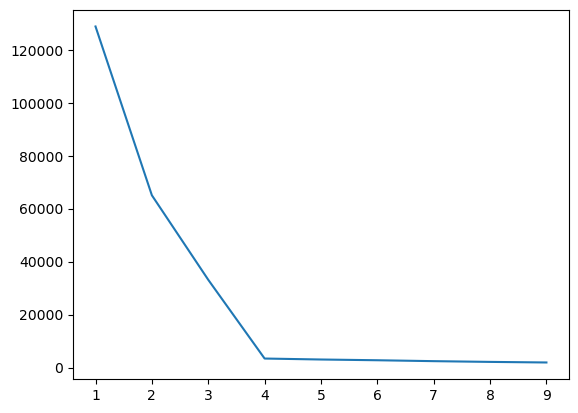

In [586]:
elbow(img_array)

The number of clusters is identified by the 'elbow' in the plot
The elbow is the point where the rate of decrease of the sum of squares becomes very small

In [587]:
centroids, clusters, variance = KMeans(4, img_array)

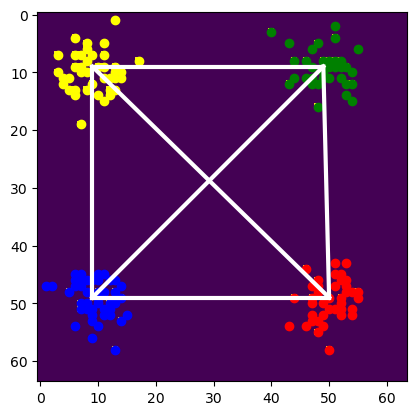

In [588]:
# this cell just plots all the points and lines

colors = ['red','green','blue','yellow','orange','magenta','cyan',]
df = pd.DataFrame(columns=['Clusters', 'Distances'])

for i in clusters:
    for j in clusters[i]:
        plt.plot(j[1],j[0], marker='o', color=colors[i])

for i in range(len(centroids)-1):
    for j in range(i+1, len(centroids)):
        dist = euclid_dist(centroids[i], centroids[j]).round(3)
        df.loc[len(df.index)] = ['Cluster ' + str(i+1) + ' and Cluster ' + str(j+1), dist]
        plt.plot([centroids[i][1], centroids[j][1]], [centroids[i][0], centroids[j][0]], color='white', linewidth=3)

cluster_names = ['Cluster '+str(x+1) for x in range(len(centroids))]
cluster_df = pd.DataFrame(data={'Cluster':cluster_names, 'Colour':colors[:len(centroids)]})

plt.imshow(img_array)
plt.show()

In [589]:
print(cluster_df)
print(df)

     Cluster  Colour
0  Cluster 1     red
1  Cluster 2   green
2  Cluster 3    blue
3  Cluster 4  yellow
                  Clusters  Distances
0  Cluster 1 and Cluster 2     40.012
1  Cluster 1 and Cluster 3     41.000
2  Cluster 1 and Cluster 4     57.280
3  Cluster 2 and Cluster 3     56.569
4  Cluster 2 and Cluster 4     40.000
5  Cluster 3 and Cluster 4     40.000
